In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=ea389fd39c3b445e2fac849b569966466dfa741ad7c8bfdff312e0a1246dfbfb
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import h2o

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdchuf2n5
  JVM stdout: /tmp/tmpdchuf2n5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdchuf2n5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_unknownUser_x15hzr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML

In [6]:
df=h2o.import_file("/content/bank_marketing.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
df.head()

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df.types

{'age': 'int',
 'job': 'enum',
 'marital': 'enum',
 'education': 'enum',
 'default': 'enum',
 'balance': 'int',
 'housing': 'enum',
 'loan': 'enum',
 'contact': 'enum',
 'day': 'int',
 'month': 'enum',
 'duration': 'int',
 'campaign': 'int',
 'pdays': 'int',
 'previous': 'int',
 'poutcome': 'enum',
 'y': 'enum'}

In [9]:
df.describe()

Rows:45211
Cols:17

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432838,,,,,1362.2720576850754,,,,15.80641879188693,,258.16307978146915,2.763840658246885,40.1978279622215,0.5803233726305537,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097543,,,,,3044.7658291685175,,,,8.322476153044585,,257.5278122651718,3.0980208832791676,100.12874599059826,2.303441044931224,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [10]:
print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]} columns')

Size of training set: 45211 rows and 17 columns


In [11]:
#Splitting the dataset into train and test datasets
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [12]:
#Specifying the Response and Predictor variables
y = "y"
x = df.columns
x.remove(y)

In [13]:
aml = H2OAutoML(max_runtime_secs=120, verbosity="info")
aml.train(x=x,y=y, training_frame=train)


AutoML progress: |
11:54:19.607: Project: AutoML_1_20240216_115419
11:54:19.612: Blending will be used.
11:54:19.615: Setting stopping tolerance adaptively based on the training frame: 0.005253271837258799
11:54:19.620: Build control seed: -1 (random)
11:54:19.632: Since cross-validation is disabled, and validation, blending frame(s) were not provided, automatically split the training data into training, validation, blending frame(s) in the ratio 70/10/20.
11:54:19.962: training frame: Frame key: AutoML_1_20240216_115419_training_py_3_sid_af91    cols: 17    rows: 25289  chunks: 8    size: 402338  checksum: 507399966316584
11:54:19.976: validation frame: Frame key: AutoML_1_20240216_115419_validation_py_3_sid_af91    cols: 17    rows: 3694  chunks: 8    size: 95384  checksum: 117518448674352
11:54:19.976: leaderboard frame: Frame key: AutoML_1_20240216_115419_validation_py_3_sid_af91    cols: 17    rows: 3694  chunks: 8    size: 95384  checksum: 117518448674352
11:54:19.999: blending f

key,value
Stacking strategy,blending
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


In [14]:

lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_3_AutoML_1_20240216_115419,0.937423,0.193563,0.63497,0.195934,0.246668,0.0608453
StackedEnsemble_AllModels_2_AutoML_1_20240216_115419,0.937287,0.193629,0.630977,0.144341,0.24697,0.0609943
GBM_2_AutoML_1_20240216_115419,0.936774,0.197719,0.619968,0.163749,0.249191,0.0620964
StackedEnsemble_AllModels_1_AutoML_1_20240216_115419,0.936643,0.19457,0.626182,0.17846,0.247593,0.0613025
StackedEnsemble_BestOfFamily_2_AutoML_1_20240216_115419,0.93625,0.195341,0.631363,0.201622,0.247459,0.0612359
StackedEnsemble_BestOfFamily_1_AutoML_1_20240216_115419,0.935627,0.196992,0.621503,0.182367,0.248693,0.0618481
GBM_1_AutoML_1_20240216_115419,0.934924,0.197897,0.61347,0.18323,0.24985,0.0624252
XGBoost_3_AutoML_1_20240216_115419,0.934483,0.198889,0.615899,0.173787,0.249472,0.0622362
GBM_3_AutoML_1_20240216_115419,0.934477,0.201108,0.615367,0.167157,0.250832,0.0629167
GBM_5_AutoML_1_20240216_115419,0.934055,0.199904,0.623543,0.205223,0.249282,0.0621414


In [15]:

# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [16]:
model_ids

['StackedEnsemble_BestOfFamily_3_AutoML_1_20240216_115419',
 'StackedEnsemble_AllModels_2_AutoML_1_20240216_115419',
 'GBM_2_AutoML_1_20240216_115419',
 'StackedEnsemble_AllModels_1_AutoML_1_20240216_115419',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240216_115419',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240216_115419',
 'GBM_1_AutoML_1_20240216_115419',
 'XGBoost_3_AutoML_1_20240216_115419',
 'GBM_3_AutoML_1_20240216_115419',
 'GBM_5_AutoML_1_20240216_115419',
 'GBM_4_AutoML_1_20240216_115419',
 'DRF_1_AutoML_1_20240216_115419',
 'XGBoost_1_AutoML_1_20240216_115419',
 'XRT_1_AutoML_1_20240216_115419',
 'XGBoost_2_AutoML_1_20240216_115419',
 'GLM_1_AutoML_1_20240216_115419',
 'DeepLearning_1_AutoML_1_20240216_115419',
 'XGBoost_grid_1_AutoML_1_20240216_115419_model_1']

In [17]:

# Get the "All Models" StackedEnsemble model
SE= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])


In [18]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(SE.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


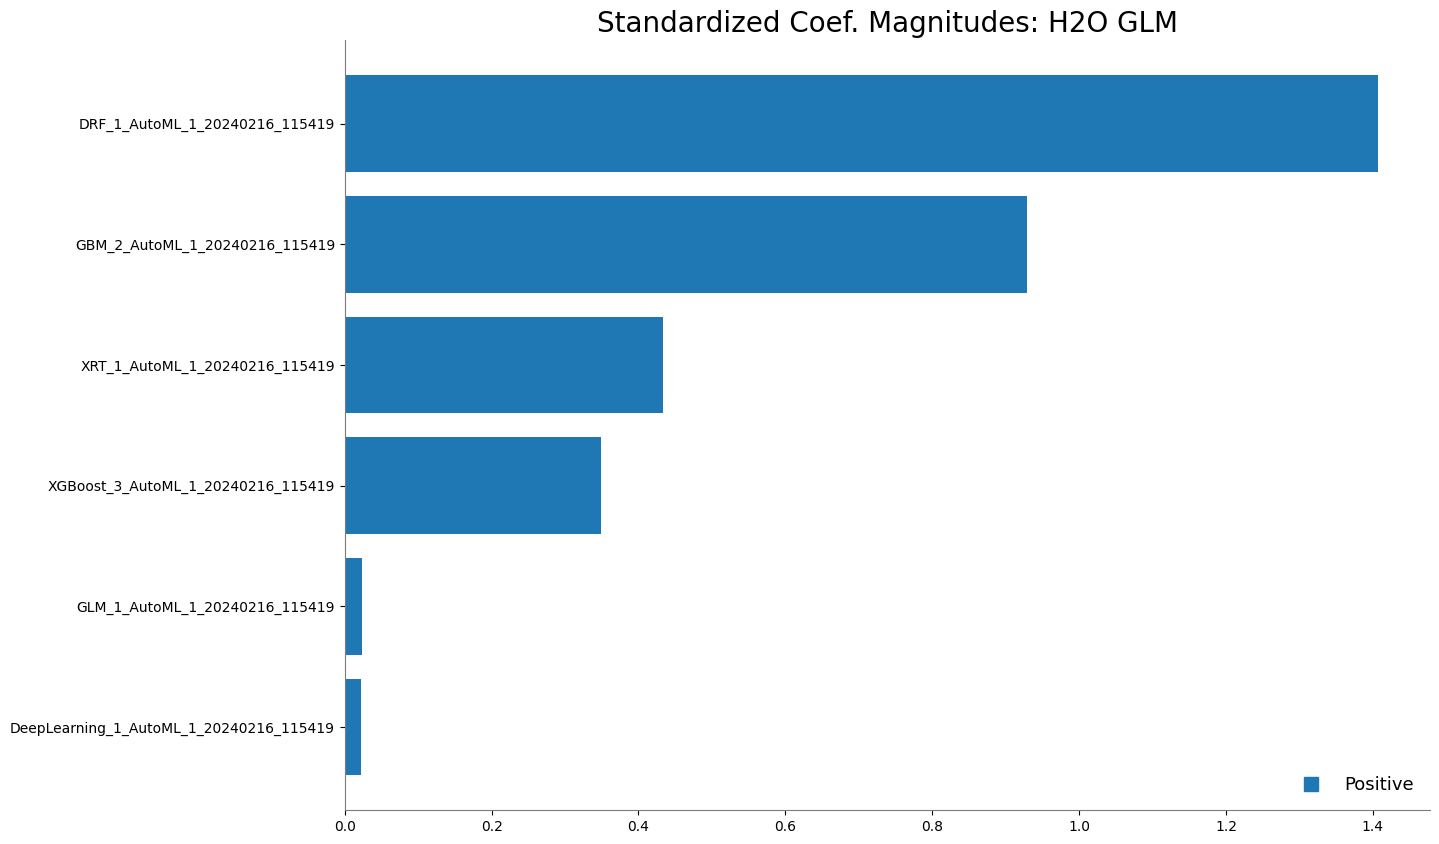

In [19]:
%matplotlib inline
metalearner.std_coef_plot()         #Examine the variable importance of the metalearner (combiner) algorithm in the ens

In [20]:

SE.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240216_115419',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_3_AutoML_1_20240216_115419'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240216_115419_training_py_3_sid_af91',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240216_115419_training_py_3_sid_af91'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240216_115419_training_py_3_sid_af91',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240216_115419_training_py_3_sid_af91'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [21]:
SE

key,value
Stacking strategy,blending
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


In [22]:
SE.confusion_matrix()

,no,yes,Error,Rate
no,8732.0,106.0,0.012,(106.0/8838.0)
yes,181.0,985.0,0.1552,(181.0/1166.0)
Total,8913.0,1091.0,0.0287,(287.0/10004.0)


In [23]:
pred=aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [24]:

pred.head()

predict,no,yes
no,0.999906,9.41155e-05
no,0.999851,0.000148547
no,0.989787,0.0102134
no,0.650169,0.349831
no,0.998751,0.0012492
no,0.999756,0.000244239
no,0.984672,0.0153279
no,0.995152,0.00484772
no,0.999486,0.000514181
no,0.999828,0.000171563


In [25]:

aml.leader.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.0604625208180297
RMSE: 0.24589127845051703
LogLoss: 0.19396361534450599
AUC: 0.9392856647417056
AUCPR: 0.6544006212320245
Gini: 0.8785713294834112
Null degrees of freedom: 8974
Residual degrees of freedom: 8968
Null deviance: 6586.74075757781
Residual deviance: 3481.6468954338834
AIC: 3495.6468954338834

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2889452534171854
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     7268  630    0.0798   (630.0/7898.0)
yes    255   822    0.2368   (255.0/1077.0)
Total  7523  1452   0.0986   (885.0/8975.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.288945     0.650059  218
max f2                       0.135163     0.753086  285
max f0point5                 0.529548     0.643636  128
max accuracy                 0.467037     0.913872  150
max precision                0.96367      1         0
max recall                   0.000200867  1         399
max specificity              0.96367      1         0
max absolute_mcc             0.277422     0.604161  223
max min_per_class_accuracy   0.166538     0.870727  269
max mean_per_class_accuracy  0.135163     0.877395  285
max tns                      0.96367      7898      0
max fns                      0.96367      1076      0
max fps                      0.000200867  7898      399
max tps                      0.000200867  1077      399
max tnr                      0.96367      1         0
max fnr                      0.96367      0.999071  0
max fpr                      0.000200867  1         399
max tpr                      0.000200867  1         399

Gains/Lift Table: Avg response rate: 12.00 %, avg score: 12.31 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100279                   0.862059           6.85185     6.85185            0.822222         0.898426     0.822222                    0.898426            0.0687094       0.0687094                  585.185   585.185            0.0666835
2        0.0200557                   0.808916           6.66667     6.75926            0.8              0.836244     0.811111                    0.867335            0.0668524       0.135562                   566.667   575.926            0.131257
3        0.0300836                   0.758811           5.55556     6.35802            0.666667         0.782258     0.762963                    0.838976            0.0557103       0.191272                   455.556   535.802            0.183169
4        0.04                        0.700199           5.43071     6.12813            0.651685         0.730299     0.735376                    0.812034            0.0538533       0.245125                   443.071   512.813            0.233097
5        0.0500279                   0.658658           6.48148     6.19896            0.777778         0.680933     0.743875                    0.785755            0.0649954       0.310121                   548.148   519.896            0.29556
6        0.100056                    0.4812             4.86266     5.53081            0.583519         0.566595     0.663697                    0.676175            0.243268        0.553389                   386.266   453.081            0.515152
7        0.150084                    0.327158           3.43356     4.83172            0.412027        